In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('csv_file/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(10000, 14)

In [6]:
df.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

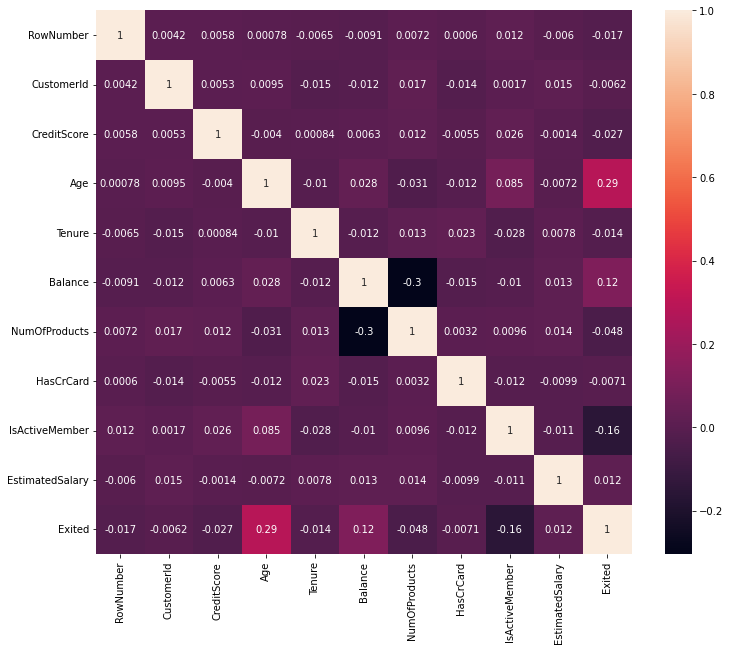

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [10]:
x = df.iloc[:,3:13].values
y = df.iloc[:,-1].values
x.shape,y.shape

((10000, 10), (10000,))

In [11]:
x[:10,1]

array(['France', 'Spain', 'France', 'France', 'Spain', 'Spain', 'France',
       'Germany', 'France', 'France'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
#lable encoding
country_encoder = LabelEncoder()
x[:,1] = country_encoder.fit_transform(x[:,1])
print(x[:10,1])

[0 2 0 0 2 2 0 1 0 0]


In [13]:
gender_encoder = LabelEncoder()
x[:,2] = gender_encoder.fit_transform(x[:,2])

In [14]:
transform = ColumnTransformer([("countries",OneHotEncoder(),[1])],remainder="passthrough")
x = transform.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [15]:
x = x[:,1:]
x.shape

(10000, 11)

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
import numpy as np
sc = StandardScaler()
x_train[:,np.array([2,4,5,6,7,10])] = sc.fit_transform(x_train[:,np.array([2,4,5,6,7,10])])
x_test[:,np.array([2,4,5,6,7,10])] = sc.transform(x_test[:,np.array([2,4,5,6,7,10])])

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
from tensorflow.keras.models import Sequential

classifier = Sequential()

In [23]:
from tensorflow.keras.layers import Dense
classifier.add(Dense(activation='relu',input_dim=11,units=256,kernel_initializer='uniform'))

In [26]:
classifier.add(Dense(activation='relu',units=512,kernel_initializer='uniform'))
classifier.add(Dense(activation='relu',units=256,kernel_initializer='uniform'))
classifier.add(Dense(activation='relu',units=128,kernel_initializer='uniform'))

In [27]:
classifier.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

In [31]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 299,009
Trainable params: 299,009
Non-trainable params: 0
_________________________________________________________________


In [33]:
classifier.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 0.4185 - accuracy: 0.8234 - val_loss: 0.3641 - val_accuracy: 0.8680
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8555 - val_loss: 0.3461 - val_accuracy: 0.8580
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8564 - val_loss: 0.3432 - val_accuracy: 0.8625
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8616 - val_loss: 0.3463 - val_accuracy: 0.8600
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.8640 - val_loss: 0.3386 - val_accuracy: 0.8630
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.8634 - val_loss: 0.3413 - val_accuracy: 0.8615
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8645 - val_loss: 0.3335 - val_accuracy: 0.8600
Epoch 

In [35]:
y_pred = classifier.predict(x_test)


In [38]:
y_pred = y_pred>0.5

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[1522,   73],
       [ 223,  182]], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.71      0.45      0.55       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [46]:
print(accuracy_score(y_test,y_pred) * 100)

85.2
